## Day 33 Lecture 1 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Recall our c section dataset. Process the data by removing any missing values, creating the appropriate dummy variables and splitting the data into train and test (20% in the test dataset).

In [5]:
# answer below:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
Age                80 non-null int64
Delivery number    80 non-null int64
Delivery time      80 non-null int64
Blood Pressure     80 non-null int64
Heart Problem      80 non-null int64
Caesarian          80 non-null int64
dtypes: int64(6)
memory usage: 3.9 KB


In [0]:
from sklearn.model_selection import train_test_split
X=csection.drop('Caesarian', axis=1)
Y=csection['Caesarian']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

Generate an SVC model with a linear kernel. Set C=10. Check the score for both train and test. Does the model overfit?

In [0]:
# answer below:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C=5)
results =svm.fit(X_train, y_train)

In [25]:
results.score(X_train,y_train)

0.75

In [26]:
results.score(X_test,y_test)

0.6875

If you have determined the model to overfit, pick a value of C based on your conclusion and show that the difference between the scores has improved.

In [27]:
# answer below:
from sklearn.model_selection import GridSearchCV
params = {'C': np.arange(1, 15,1)}
grid = GridSearchCV(svm, param_grid=params,  cv=3, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

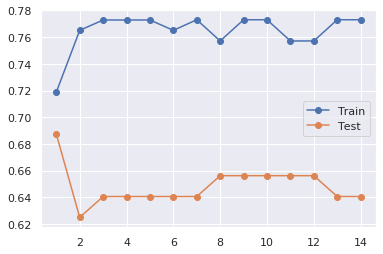

In [30]:
cv_r = pd.DataFrame(grid.cv_results_) 
import seaborn as sns
sns.set()

plt.plot(cv_r['param_C'], cv_r['mean_train_score'], 'o-', label='Train') 
plt.plot(cv_r['param_C'], cv_r['mean_test_score'], 'o-', label='Test') 
plt.legend() 
plt.show()

What if we switched up the target variable? Let assume that we know whether a patient received a c section. Let's try to predict whether she has high blood pressure. 

Create the SVC model with a linear kernel with Blood Pressure as the target variable. Report both the train and the test scores.

In [0]:
# answer below:
X=csection.drop('Blood Pressure',axis=1)
Y=csection['Blood Pressure']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
params = {'C': np.arange(1, 15,1)}
grid = GridSearchCV(svm, param_grid=params,  cv=3, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


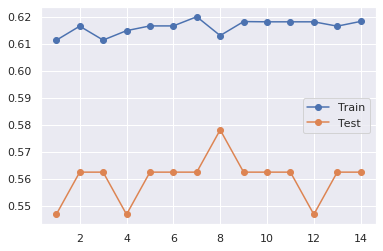

In [37]:
params = {'C': np.arange(1, 15,1)}
grid = GridSearchCV(svm, param_grid=params,  cv=10, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
cv_r = pd.DataFrame(grid.cv_results_) 


plt.plot(cv_r['param_C'], cv_r['mean_train_score'], 'o-', label='Train') 
plt.plot(cv_r['param_C'], cv_r['mean_test_score'], 'o-', label='Test') 
plt.legend() 
plt.show()

Now try to generate the model using the one vs. one decision function.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


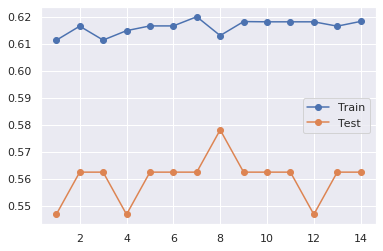

In [41]:
# answer below:
params = {'C': np.arange(1, 15,1), 'decision_function_shape':['ovo'] }


grid = GridSearchCV(svm, param_grid=params,  cv=10, return_train_score=True, n_jobs=-1)


grid.fit(X_train, y_train)
cv_r = pd.DataFrame(grid.cv_results_) 


plt.plot(cv_r['param_C'], cv_r['mean_train_score'], 'o-', label='Train') 
plt.plot(cv_r['param_C'], cv_r['mean_test_score'], 'o-', label='Test') 
plt.legend() 
plt.show()